In [ ]:
# 金融高级案例----基于波动率与尾部风险实现资产配置优化

## 案例知识小结
### 案例概述
本案例提供了两种不同的资产配置优化方法：基于组合收益率波动率的优化以及基于组合尾部风险的优化。两种优化方法会得到不同的资产配置权重的结果，取决于投资者更关心总体风险还是尾部风险。

### 概念小结
* 对数收益率：金融资产当期价格和上期价格之比的对数
* 波动率：衡量资产风险，计算为收益率的标准差
* 效用函数： 衡量投资者从组合中得到的效用的函数
* 风险厌恶系数：衡量投资者对风险的厌恶程度
* 有效边界：收益—风险约束条件下能够以最小的风险取得最大的收益的资产组合的集合
* 在险价值（VaR）：在一定概率水平（置信度）下，某一金融资产或证券组合的价值在未来特定时期内的最大可能损失
* 条件在险价值(CVaR)：也被称为Expected Shortfall（ES），指在投资组合的损失超过某个给定VaR值的条件下，该投资组合的平均损失值。

### 资料参考
* [现代投资组合理论](https://zh.wikipedia.org/wiki/%E7%8E%B0%E4%BB%A3%E6%8A%95%E8%B5%84%E7%BB%84%E5%90%88%E7%90%86%E8%AE%BA)
* [风险厌恶和效用函数](https://zh.wikipedia.org/wiki/%E9%A3%8E%E9%99%A9%E5%8E%8C%E6%81%B6)
* [资本资产定价模型](https://zh.wikipedia.org/wiki/%E8%B5%84%E6%9C%AC%E8%B5%84%E4%BA%A7%E5%AE%9A%E4%BB%B7%E6%A8%A1%E5%9E%8B)
* [主动投资组合管理](https://book.douban.com/subject/25984361/)
* [Google Finance 帮助](https://support.google.com/docs/answer/3093281?hl=en)
* [在险价值](https://zh.wikipedia.org/wiki/%E9%A3%8E%E9%99%A9%E4%BB%B7%E5%80%)
* [条件在险价值](https://en.wikipedia.org/wiki/Expected_shortfall)


## 案例框架
波动率优化![process](./pictures/process.png)
尾部风险优化![process](./pictures/process2.png)

In [2]:
## 关于金融资产
1. 收益率
组合资产收益率是组合中各个资产的收益率的加权平均值，经常使用的有对数收益率和简单收益率。由于金融资产的收益率大多成尖峰厚尾的分布形态，因此量化模型中大多会使用对数收益率。
$$r=ln(p_1/p_0)$$
$r$:对数收益率
$p_1$:当前资产价格
$p_0$:上一阶段资产价格
2. 波动率
波动率用于衡量资产的风险，即收益率序列的标准差。对于资产组合，波动率为资产收益率的标准差。

3. 资产间相关系数
如果两个资产之间呈正相关（相关系数ρ>0），那么两个资产之间的价格和收益率将同向变动；如果呈负相关（相关系数ρ<0），那么两个资产之间的价格和收益率将反向变动。 因此，负相关的资产往往能够对冲掉部分风险，使得投资组合的整体风险降低。

4. 风险厌恶系数
风险厌恶系数是资产配置中极为重要的参数，反映了投资者个性化的对风险的承受能力。用a表示风险厌恶系数，代表每多承担一单位风险，投资者要求的最低的预期收益率的提升。
eg：a=5，风险和预期收益率都用1%作为最小单位，那么a=5 意味着投资者要求收益率至少增加5%才愿意多承担1%的风险。
风险厌恶系数越大，代表投资者越保守。通常情况风险 厌恶系数应大于零。

5. 夏普比率（Sharpe Ratio）
即资产的盈利能力，计算式为Sharpe=（收益率-无风险利率）/波动率
夏普比率越大，即一单位风险带来的收益越大。

6. 效用函数
    效用函数是一个 R → R  上的函数；如果财富为w，那么 $U(w)$ 代表投资者从w中获得的效用（满足度); 通常效用函数 $U(w)$ 应该满足以下条件：
*   财富越多，带来的效用越多，即 $U'(w)>0$
*   财富增加，边际效用递减，即 $U''(w)<0$
    （eg：财富从1美元增长到2美元带来的效用大于财富从100美元增长到101美元的效用）
    因此，通常效用函数应有如下图形：
    ![utility](./pictures/utility.png)
    
7. 在险价值（VaR）
假设L为一个随机变量，其CDF为F，给定一个置信水平$\alpha$, 定义
$VaR_\alpha（L）=inf[l∈R|P[L>l]\le1-\alpha]$
&#8195;&#8195;&#8195;&#8195;&#8195;$=inf[l∈R|F(l)\ge \alpha]$
即在险价值是能够保证 $L$大于 $l$ 的概率不大于$（1-\alpha）$的$l$的最小水平

8. 条件在险价值（CVaR，ES）
   CVaR也是一种衡量尾部风险的方法，沿用上一条的假设，可以将CVaR写作：
   $CVaR_\alpha（L）=\frac{1}{1-\alpha}\int_\alpha^1 VaR_u(L)du$
其中需满足 $E[|L|]<\infty$
CVaR也可以理解为超过VaR的所有损失的平均值，为方便理解和计算，所有VaR均以绝对值形式出现。


SyntaxError: invalid syntax (<ipython-input-2-b8ddd7e2b556>, line 2)

In [ ]:
##数据准备
1. 数据来源
    从Google Finance上提取了6只股票的月数据，股票代码分别为：
	HSY，AAPL，DIS，GOOG，WMT，KO
    其中必须的数据为资产的每日调整后的收盘价
    若使用未调整的收盘价，则收益率需要根据股票分红，股票分割等事件进行相应的调整，避免造成异常收益率


In [1]:
#加载所需要的包
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from scipy import stats

In [ ]:
2. 数据预处理：
*	读入价格数据
*	由当前价格和上一月的收盘价计算对数收益率
*	缺失值和异常值处理
	* 缺失的收益率可用历史平均收益率代替（注：不建议直接用平均价格代替缺失的价格数据）
    * 在3个标准差之外的收益率直接作为异常值删除（可根据已知收益率分布进行调整）
*	（*） 收益率协方差矩阵处理
    高相关的资产会对优化结果造成巨大影响。除了使用样本协方差矩阵外，还有一种方法调整利用历史数据计算出来的收益率协方差矩阵。
    * 对角线调整——在收益率协方差矩阵的主对角线上统一加上一个极小的数字（例如0.001，0.005），这样在我们对矩阵求逆的时候能够保证结果误差不会被放大；但是此方法会导致估计的协方差矩阵有偏

In [3]:
#请将data_path改为data目录
data_path='/home/niyu/Documents/Project/DataFountain/MVO/data/'
os.chdir(data_path)
data_list=glob.glob('*.csv')
name=[i[0:-4] for i in data_list]
data=[pd.read_csv(i) for i in data_list]
log_return = [np.log(i['Adj Close']).diff() for i in data]
return_df=pd.DataFrame(log_return,index=name).transpose()

print("读入数据完成")
print("可投资的股票代码为:"+str(name))

读入数据完成
可投资的股票代码为:['HSY', 'AAPL', 'DIS', 'GOOG', 'WMT', 'KO']


In [15]:
def clean(df,threshold):
    """
    对收益率csv进行数据清洗
    
    1. 去除空值
    2. 去除异常值
    
    
    输入:
        df:收益率数据dataframe
        threshold: 几个标准差外判定为异常值
        
    return:
        清洗后的dataframe

    """
    
    #删除空值
    df=df.dropna()
    
    #删除异常值
    z = np.abs(stats.zscore(df))
    line_no=list(set(np.where(z > threshold)[0]))
    df=df.drop(line_no)
    
    return df

clean_data=clean(return_df,3)
l=int(0.8*len(clean_data))
train_data=clean_data.iloc[0:l]
test_data=clean_data.iloc[l:]
print("数据清洗完成，划分训练集合与测试集完成")

数据清洗完成，划分训练集合与测试集完成


In [16]:
Y=np.array(clean_data)
day,n=Y.shape
mu=np.mean(Y,axis=0).reshape(1,n)
sigma=np.cov(Y,rowvar=0,bias=1)

# 协方差矩阵调整
np.fill_diagonal(sigma,sigma.diagonal()+0.003)

In [ ]:
## 模型建立
### 基于波动率的资产配置优化
1. 目标
    通常来说，投资组合的目标有两个：最大化收益和最小化风险。因此优化的目标就是找到一个平衡点，而这一平衡点更趋向最大化收益还是最小化风险，就会取决于投资者的风险厌恶系数。

    假设组合中共有n个资产, R 为整个组合的收益率

    目标函数： maximize $E(R)-aw^T\Sigma w$
   &#8195;&#8195;&#8195;&#8195;&#8195; →    maximize  $r^Tw-aw^T\Sigma w$  &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(1）
    ——其中$w$为组合中各个资产的权重（$w$∈[0,1]），a 为风险厌恶系数，Σ 是收益率协方差矩阵（nxn）

2. 	约束条件
	最为关键的约束条件是资产的权重之和为1，即
	$\sum^{n}_{i=1}{w_i}=1$ &#8195;&#8195;&#8195;&#8195;&#8195;(2)
	实践操作中可以规定各个资产的权重上限

3.	确定风险厌恶系数
    在第一部分中引入了效用函数，即$U(w)$. 常见的有以下效用函数：
* 指数效用函数 $U(w)=-e^{-aw};  a>0$
* 对数效用函数 $U(w)=ln(w);  w>0$
* 乘方效用函数 $U(w)=\frac{w^{1-b}}{1-b};  b>0 ; b\neq1; w>0$
* 二次效用函数 $U(w)=w-cw^2; c>0$

    可以利用效用函数来确定投资者的风险厌恶程度——— 效用函数凹形越大（即$U''(w)$ 负的越多）代表为了增加一单位效用，所以需要增加的财富越多，证明投资者越加风险厌恶；因此，绝对风险厌恶指数可以表示为：$A(w)=-\frac{U''(w)}{U'(w)}$
    $A(w)$ 的值越大，代表投资者越保守；通常风险厌恶系数为0~10

4.	优化结果推导
    从（1）（2）式可以将优化目标转化为：
    minimize  &#8195; $\frac{1}{2} w^T Σw-\frac{1}{a} r^T w$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(3）
    subject to   &#8195;$e^T w=1$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(4)
    其中e为全为1的向量，同时，记λ=1/a，且λ>0

    此优化的KKT 条件为：
   $0= Σw-λw-γe$             &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(5)
    $e^T w=1$ &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(6)
	可以求出（5）（6）的结果为：
	$γ=\frac{1-λw^T Σ^{-1} e}{e^T Σ^{-1}e}$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(7)
	若记 $w_{mv}=\frac{Σ^{-1}e)}{(e^TΣ^{-1}e)}$$,$$w_{mk}=\frac{Σ^{-1}w}{e^TΣ^{-1}w}$  
	那么（3） 中最优解：
   $w_λ=\frac{Σ^{-1}e}{e^T Σ^{-1}e}+k[\frac{ Σ^{-1} w}{m^TΣ^{-1} e}- \frac{Σ^{-1} e}{e^T  Σ^{-1} e}]$   &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(8)
    $=(1-k)  \frac{ Σ^{-1} e}{e^T  Σ^{-1} e}+k \frac{ Σ^{-1} w}{m^T Σ^{-1} e}$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(9)
    $=(1-k) w_{mv}+kw_{mk}$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(10)
    其中 $k= λ(m^T Σ^{-1}e)$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(11)


In [17]:
def MVO(data,risk_aversion,upper,w0):
    """
    均值方差优化模型
    
    输入:
        data: 股票收益率矩阵
        risk_aversion: 投资者风险厌恶指数
        upper: 每个资产的最大权重的列表
        w0: 组合初始权重
        
    return:
        最佳组合权重
    """

    # 目标函数
    def obj(w,mu,sigma,risk_aversion):
        return -np.dot(mu,w)+0.5*risk_aversion*np.dot(np.dot(w.T,sigma),w)
    
    # 约束条件
    constraint_list=[]
    Aeq = np.ones((1, n))
    beq = 1
    
    # 权重限制
    bound=[(0,i) for i in upper]
    sum_weights_constraint={'type': 'eq', 'fun' : lambda x: np.dot(Aeq, x) - beq, 'jac' : lambda x: Aeq}
    constraints_tuple=tuple(constraint_list)
    sum_weights_tuple=sum_weights_constraint,
    constraints_tuple=constraints_tuple+sum_weights_tuple
    
    # 优化函数
    results=minimize(lambda x: obj(x, mu, sigma, risk_aversion), w0, 
                    constraints=constraints_tuple, bounds=bound, method='SLSQP', options={'disp': True})
    return results.x

print("波动率优化模型建立完毕")

波动率优化模型建立完毕


In [ ]:
### 基于尾部风险的资产配置优化
1.  CVaR的计算表达
首先我们假设组合的损失函数为$f(x,y)$, x 为资产权重向量，y为预期收益率向量，$f (x, y) =<x , -y>$

	记 $\Phi (x, \beta) =\int_{f(x,y)\le\beta}p(y)dy$ 为 $f (x, y)$ 不会超过临界值$\beta$ 的概率。为了确定$\beta$的值，我们可以先认为$\beta$是一个关于$x$和$\alpha$的函数，其中$\alpha$是置信水平（通常为0.95）

	根据条件在险价值的定义，可以写出：
$$\phi (x, \alpha) =\frac{1}{1-\alpha}\int_{f(x,y)\le\beta}f(x,y)p(y)dy$$

2. 最小化CVaR推导
可以看到上述的CVaR表达式并不方便我们进行优化，因此我们先转换此公式的形式：
$$\phi (x, \alpha) =\frac{1}{1-\alpha}\int_{f(x,y)>\beta}f(x,y)p(y)dy$$
$$=\frac{1}{1-\alpha}[\int_{f(x,y)>\beta}(f(x,y)-\beta)p(y)dy+\int_{f(x,y)>\beta}\beta p(y)dy]$$
$$=\frac{1}{1-\alpha}\int_{f(x,y)>\beta}(f(x,y)-\beta)p(y)dy+\frac{\beta}{1-\alpha}(1-\phi(x,\beta))$$

  现在假设$\beta$是一个关于$x$和$\alpha$的函数，即$\beta=\beta(x,\alpha)$,而$\beta(x,\alpha)$也是损失分布的$\alpha$分位（quantile），因此有$\Phi(x,\beta(x,\alpha))=\alpha$

因此，记$\phi (x, \alpha)$在$\beta(x,\alpha)$ 处为：
$$F_\alpha(x,\beta)=\frac{1}{1-\alpha}\int_{f(x,y)>\beta}(f(x,y)-\beta)p(y)dy+\frac{\beta}{1-\alpha}\Phi(x,\beta(x,\alpha))$$
$$=\frac{1}{1-\alpha}\int_{f(x,y)>\beta}(f(x,y)-\beta)p(y)dy+\beta$$
并且有：
$$\frac{F_\alpha(x,\beta)}{d\beta}=\frac{1}{1-\alpha}(\Phi(x,\beta)-1)+1$$

一阶条件（F.O.C)：
$$\frac{F_\alpha(x,\beta)}{d\beta}=0$$
$$\Rightarrow \beta=\beta(x,\alpha)$$ 因此$\beta(x,\alpha)$ 最小化了$F_\alpha(x,\beta)$

根据上述推导，有如下等式：
$$CVaR_{\alpha}=\phi(x,\alpha) 在 \beta(x,\alpha)处的值=F_\alpha(x,\beta(x,\alpha))=min_{\alpha}F_\alpha(x,\beta)$$
在实际的优化过程中，最小化$F_\alpha(x,\beta)$相当于最小化$（1-\alpha)F_\alpha(x,\beta)$

3. 优化松弛
为了简化，假设所有的CDF均为连续函数，不存在跳跃和间断点。CVaR最小化可以被写为一个凸优化(Rockafellar and Uryasev, 2000)

$$min_{(x\in X)}  \phi_{\alpha}(x)=min_{((x,\beta)\in X\times R)} F_{\alpha}(x,\beta) $$
即在$x\in X$中找到最优$x$使得CVaR最小，等价于 在$（x,\beta)\in X\times R$中找到最优的$（x,\beta)$使得$F_{\alpha}(x,\beta)$最小

4. 优化实现
	即便上述过程已经将CVaR的优化改写为了一个凸优化，但是对于积分我们依旧需要处理。一般来说数值求积分可以用离散法和高斯积分法。由于高斯积分涉及其他的代数知识，这里选用离散法。假设训练集中使用的数据条数为J，那么CVaR可以由以下公式近似：
$$F_\alpha(x,\beta)=quantile(f(x,y),\alpha)+\frac{1}{1-\alpha}[\frac{1}{J}\sum(f(x,y_j)-quantile(f(x,y),\alpha))^+]$$

$quantile(f(x,y),\alpha)$ 为f(x,y)的$\alpha$处的分位值; $(x)^+=max(0,x)$

In [18]:
#定义优化的目标函数
def obj_fun(w,r,p,i):
    """
    利用离散方法转化积分求CVaR并且附加惩罚项
    
    输入：
        w： 权重
        r： 股票收益率矩阵
        p： alpha置信度，一般为0.95
        i： 使用的数据长度
        
        
    return:
        CVaR的值
    """

    return_df_=pd.DataFrame(np.dot(-r,w).reshape(len(r),1))
    VaR = return_df_.quantile(p)[0]
    return_list=return_df_.values.tolist()
    fun=VaR+(1/i)*(1/(1-p))*sum([max(m[0]-VaR,0) for m in return_list])
    return fun

def Cvarfunction(r,p,UB,LB):
    """
    最小化CVaR的主要函数
    
    输入：
        r： 股票收益率矩阵
        p： alpha置信度，一般为0.95
        UB： 权重上限
        LB： 权重下限
        
    return：
        资产组合CVaR，VaR以及分配的权重
    """
    
    
    [i,j]=r.shape
    w0=np.ones((j,1))/j
    
    Aeq=np.ones((1,j))
    beq=1
    
    bound= [(LB,UB) for i in range(j)]
    cons=({'type':'eq','fun':lambda w:np.dot(Aeq,w)-beq ,'jac' : lambda w: Aeq})


    res = minimize(lambda w: obj_fun(w,r,p,i), w0, constraints=cons, bounds=bound, method='SLSQP')
    cvar=res.fun
    var=pd.DataFrame(np.dot(-r,res.x)).quantile(p)[0]
    return cvar,var,res.x

print("CVaR优化模型建立完毕")

CVaR优化模型建立完毕


In [ ]:
# 模型评价
### 基于波动率的资产配置优化
1. 有效边界
	从简单的n=2开始，即现在组合里只有两个资产，为Security1 和Security2； 它们的预期收益率和波动率分别记为$r_1$,$r_2$,$σ_1$,$σ_2$
	假设Security2 的预期收益率和波动率均大于Security1，那么可以在平面上找到两个点，分别代表这两个资产
	当n=2时，可以将组合的预期收益和组合收益方差写成下列形式：
    $E(R)=w_1 r_1+w_2 r_2$   &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(12)
    $Var(E(R))=Var(w_1 r_1+w_2 r_2 )  =w_1^2  σ_1^2+w_2^2  σ_2^2+2ρw_1 w_2 σ_1 σ_2$ &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195; &#8195;&#8195;(13)
	并且有$w_1+w_2=1$&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;(14)
	结合（12）-（14），随着$w_1$在(0,1)之间取值，可以画出一个组合风险vs组合收益率的曲线图（这里组合风险使用的是组合收益方差的标准差，即（13）式的根式结果）
    ![ef1](./pictures/ef1.png)
    这就是最简单的有效边界。当我们有多于2个的资产时，所需要做的只是将预期收益率同样进行加权平均，同时将方差写成矩阵形式：$$Var(E(R))=w^T Σw$$

2. 有效边界性质
    * 任何一个在有效边界上的点都代表了一个给定资产权重的投资组合；当然在有效边界内也存在一些投资组合，但是给定一个有效边界内的投资组合P，在有效边界上总能找到一个和P有相同波动率但是却有更高预期收益率的组合。因此，为了追求利益最大化，投资者总会选择有效边界上的组合。最终体现为最佳投资组合点会根据不同的风险厌恶系数在有效边界上移动
    * 当对资产最高权重进行限制时，有可能优化的结果并不在有效边界上

3. 优化结果评价流程
    * 随机生成大量的资产权重样本，计算它们的收益率和波动率画在图中
    * 将最优组合的点也画在图中，如果最优点在有效边界上，并且随着风险厌恶系数的减小而向右移动，则优化成功
![ef2](./pictures/ef2.png)

每个资产权重上限为:[0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.0058981090979570204
            Iterations: 9
            Function evaluations: 72
            Gradient evaluations: 9
优化结果:
            权重
HSY   0.229654
AAPL  0.266442
DIS   0.168186
GOOG  0.016806
WMT   0.237038
KO    0.081874

--最佳资产组合预期收益率: 0.011
--最佳资产组合波动率: 0.047
--最佳资产组合夏普比率: 0.243


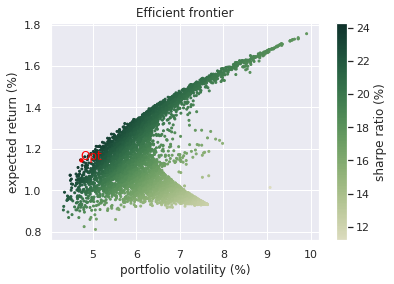

In [19]:
def info(weights):
    """
    给定权重，计算资产组合信息
    
    输入:
        资产权重
        
    return:
        预期收益率, 波动率,夏普比率
    """
    mu_r=np.dot(mu,weights)[0]
    vol=np.sqrt(np.dot(np.dot(weights.T,sigma),weights))
    sharpe=mu_r/vol
    
    return [vol,mu_r,sharpe]

upper_bound_list=[0.3]*n
print("每个资产权重上限为:"+str(upper_bound_list))
opt_w=MVO(Y,5,upper_bound_list,[0]*n)

print("优化结果:")

result_df=pd.DataFrame(opt_w,index=name,columns=['权重'])
print(result_df)
print()
volatility,expected_return,sharpe=info(opt_w.reshape(n,1))
print("--最佳资产组合预期收益率:",np.round(expected_return[0],3))
print("--最佳资产组合波动率:",np.round(volatility[0][0],3))
print("--最佳资产组合夏普比率:",np.round(sharpe[0][0],3))


#plot efficient frontier
def ef(optimal_weights,m=10000):
    """
    画出有效边界和最佳资产组合
    
    输入:
        optimal_weights: 最佳资产组合权重
        m: 组合中资产个数
        
    return:
        无
        
    """
    #随机生成权重
    w_list=[0]*n
    res=[1]*m
    w=[0]*m
    for i in range(n-1):
        w=[np.random.uniform(low=0,high=k,size=1)[0] for k in res]
        res=[h-k for h,k in zip(res,w)]
        w_list[i]=w
    
    w_list[n-1]=res
    w_arr=np.array(w_list)
    w_list=list(w_arr.T)
    w_list.append(optimal_weights)
    
    #计算资产组合信息
    information=np.array([info(i) for i in w_list])
    x,y,z=information[:,0],information[:,1],information[:,2]
    x,y,z=x*100,y*100,z*100
    
    #画图
    sns.set()
    cmap=sns.cubehelix_palette(as_cmap=True,rot=-0.4,start=2.5)
    f,ax=plt.subplots()
    points=ax.scatter(x,y,c=z,s=4,cmap=cmap)
    cbar=ax.figure.colorbar(ax.collections[0])
    ax.scatter(x[-1],y[-1],c='red',s=10)
    plt.text(x[-1],y[-1],'Opt',c='red')
    ax.collections[0].colorbar.set_label('sharpe ratio (%)')
    plt.xlabel('portfolio volatility (%)')
    plt.ylabel('expected return (%)')
    plt.title('Efficient frontier')
    plt.show()
    
    return None

ef(opt_w,5000)

In [ ]:
### 基于尾部风险的资产配置优化
1. 测试集CVaR计算
* 在优化中，仅使用前80%的数据作为训练集（注意这里的训练集不可以完全随机选择，只可以选择日期靠前的数据），后20%的数据作为训练集。优化之后，根据最佳权重计算实际的CVaR，即后20%算出的收益率序列的最小5%的收益的平均值作为实际CVaR（Empirical CVaR）

2. 与其他资产组合进行比较
* 同样的，我们可以随机生成一些资产组合权重（需保证权重和为1且每个资产权重不超过其上限），将这些随机组合未来的实际CVaR与最优资产组合的实际CVaR进行比较。
![backtest](./pictures/backtest.png)



In [20]:
#定义回测函数
def backtesting(testing_set,opt_w,sample_size,n,UB,LB,p):
    """
    使用测试集将优化组合的CVaR与其他组合进行对比
    
    输入：
    testing_set：测试集数据
    opt_w：最优组合权重
    sample_size：想要比较的组合数目
    n：股票个数
    UB：权重上限
    LB：权重下限
    p：alpha置信水平
    
    return:
        无
    """
    test_return=np.array(testing_set)
    sns.set()
    w_list=[0]*n
    res=[1]*sample_size
    w=[0]*sample_size
    for i in range(n-1):
        w=[np.random.uniform(low=max(0,LB),high=min(k,UB),size=1)[0] for k in res]
        res=[h-k for h,k in zip(res,w)]
        w_list[i]=w
    
    w_list[n-1]=res
    w_arr=np.array(w_list)
    w_list=list(w_arr.T)
    w_list.append(opt_w)
    
    days=len(testing_set)
    test_return=[np.dot(-test_return,w) for w in w_list]
    cutoff=int(p*days)
    empirical_CVaR=[np.mean(sorted(i)[cutoff:]) for i in test_return]
    plt.plot(empirical_CVaR[0:-1],'bo')
    plt.hlines(empirical_CVaR[-1],0,sample_size)
    plt.xlabel('Portfolio Number')
    plt.ylabel('CVaR')
    plt.title('CVaR backtesting')
    plt.show()
    
    return None

print("回测函数建立完毕")

回测函数建立完毕


优化结果：
                权重
HSY   2.260461e-01
AAPL  7.547189e-02
DIS   9.300036e-18
GOOG  1.484720e-01
WMT   4.999984e-01
KO    5.001167e-02

最佳资产组合CVaR 0.0649
最佳资产组合VaR 0.0455
最佳资产组合预期收益率 0.0078


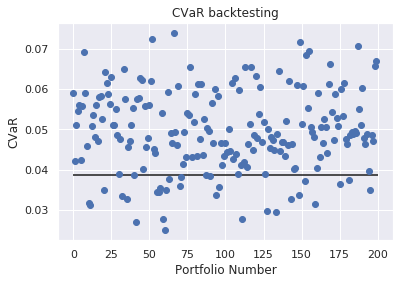

In [21]:
r=np.array(train_data)
p=0.95
n=len(name)
UB=0.5
LB=0
CVaR,VaR,weights=Cvarfunction(r,p,UB,LB)
result_df=pd.DataFrame(weights,index=name,columns=['权重'])
expected_r=np.dot(np.mean(r,axis=0),weights)

print("优化结果：")
print(result_df)
print()
print("最佳资产组合CVaR",np.round(CVaR,4))
print("最佳资产组合VaR",np.round(VaR,4))
print("最佳资产组合预期收益率",np.round(expected_r,4))

backtesting(test_data,weights,200,n,UB,LB,p)

In [ ]:
* 图中黑色横行为最佳资产组合的实际CVaR值，蓝色的点为其余随机资产的CVaR。可以看到最佳组合资产相较200个随机组合来讲，拥有较低的实际CVaR。我们无法保证最佳组合拥有最小的未来的CVaR因为金融市场的极端事件难以预测。

In [ ]:
## 优化思路
### 基于波动率的资产配置优化
1. 数据和预处理
    * 提高数据采集频率可以有效提高波动率预测的准确程度（例如采用日收益而非月收益数据）
    * 利用Ledoit-Wolf估计协方差矩阵
    LedoitWolf是一种估计稳健协方差矩阵的方法，对于样本协方差矩阵S，真正的协方差矩阵$Σ$ 和单位矩阵I，Ledoit-Wolf方法在于找到系数k, 令$Σ^*=kS+(1-k)I$ 使得 $E[||Σ^*-Σ||^2]$ 最小

2. 模型优化
    * 有效边界刻画：在随机生成和为1 的资产权重的时候，常见的方法是将n个随机生成的数字除以他们的和，强制将其和限制为1 。 这种方法可以运用在生成有效边界中，但是随着资产个数的增加此方法将很难生成一些较为极端的权重情况，导致有效边界无法被完整画出。这是因为此方法生成的n个权重在n维上并非均匀分布
    * 加入无风险资产：Markwitz模型在本案例中用于风险资产的配置，实际中可以加入无风险资产，能够更精确的找到最优配置点

### 基于尾部风险的资产配置优化
1. 估计更准确的CVaR
* CVaR是分布中，超过VaR部分的平均值。此模型中使用的是基于历史数据的CVaR估计，这将会很大程度依赖于历史中出现的情况，无法真正涵盖所有可能出现的情况；因此另一个方法则是先拟合出收益率的分布函数（常用的有正态分布，对数正态分布，或KDE非参估计）。 只要收益率分布函数足够准确，尾部风险就能被更精确的计算出来。

2. CVaR的线性松弛
* 尽管我们已经能够将此优化化为凸优化的形式，因此局部最优解会和全局最优解一致。进一步优化的形式可以将CVaR加入线性松弛的方法，即将此优化完全转为线性优化，从而对于较大的资产组合能够节省大量的优化时间。线性松弛可以参考[Rockafellar](https://sites.math.washington.edu/~rtr/papers/rtr187-CVaR2.pdf)

### 基于实际金融市场优化思路
1. 整数优化
	两种优化方法最后的结果都是权重，而实际中购买资产的数量需要整数，同时不可以超过市场中流动的资产上限。因此在优化中，可以采用整数优化，得到最后的需要调整的资产数量

2. 考虑交易费用
	同样的，调整资产权重必然涉及到交易费用，当把交易费用计算上之后，存在这样一种情况：调整资产权重所支付的交易费用超过了调整资产带来的收益。这个时候优化器所得到的结果应该变为不做出任何调整

## 结论
本项目基于实际金融市场，对传统的Markowitz资产配置模型和尾部风险优化模型进行了代码实践，同时提出了进一步的优化思路。这些产配置模型可以用于多种资产类型，例如股票，债券或者指数等。基于资产以往的收益率、波动率以及尾部风险情况，来对下一期资产权重配置进行优化。